## League Analysis Example

A example of analysis in game data from riots api.

This notebook was written to show examples of how to use the LeagueAnalysis class to get data from riot, and how to view the the data within the dataframes. Due to the size of this particular file, GitHub believes that this repo is primarally a jupyter notebook repo.  However, more efford has been placed into creating a class that cleans the data, retieves the data, and stores the data locally. I personally find that notebooks are a great way to display pd.DataFrames, and this is the prime reason why I have included this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from LeagueAnalysis import LeagueAnalysis

### Firstly initalise the class with **your** working api key.
You can obtain a api key from: https://developer.riotgames.com/. 
However, the api key is only valid for 24hours.  This is one of reasons for caching the reponses from riots api within a local databse.

In [2]:
# Initalise the class with your working api key:
apiKey = "RGAPI-be013ceb-17d3-445a-82fa-e1bd7bba68fk" # <- example key. 
lolA = LeagueAnalysis(apiKey, summonerName="Moving Object 1" )

## List of examples within this notebook
- Example 1: Creating a mastery list
- Example 2: Event data.
- Example 3: Champion timeline data.
- Example 4: Plotting mulit-game champion timeline data.
- Example 5: Combiing multiple summaries into a single dataframe for a single champion.
- Example 6: Plotting positional data on summonmers rift.
- Example 7: Plotting kills and death locations.
- Example 8: Plotting positional data on a summonmers rift -- champion data.

### Example 1: creating a mastery list
The create_mastery_table method uses information returned from champion-mastery-v4 and the data dragon to create the resulting dataframe.

In [3]:
# Creating a champion mastery list:
df =  lolA.create_mastery_table()
df.head(10)

,name,championLevel,championPoints,lastTimePlayed-dt
0,Twitch,7,146444,2021-12-26 11:12:02
1,Brand,6,32023,2021-12-24 19:26:17
2,Xerath,3,12115,2021-12-25 08:41:13
3,Master Yi,3,6649,2021-12-25 17:05:55
4,Jhin,3,6475,2021-11-15 19:32:40
5,Nami,2,4827,2021-12-19 10:59:53
6,Teemo,2,3598,2021-11-14 05:58:14
7,Vayne,2,2277,2021-11-21 19:37:37
8,Mordekaiser,2,2113,2019-03-28 01:46:25
9,Ashe,1,1324,2021-12-21 09:50:52


This method has the option to override/use another summoner name other than the one used int the initalisation, as can be seen below.

In [4]:
# Creating a champion mastery list with a different summoner name:
df =  lolA.create_mastery_table(summoner_name='Froggen')
df.head(10)

,name,championLevel,championPoints,lastTimePlayed-dt
0,Anivia,7,352515,2021-12-02 13:04:16
1,LeBlanc,7,77950,2021-11-27 13:03:38
2,Lux,7,75682,2021-11-26 10:20:30
3,Twisted Fate,7,70715,2021-11-26 12:01:36
4,Veigar,7,66019,2021-11-27 17:26:56
5,Karthus,7,60517,2021-10-10 12:16:52
6,Ezreal,7,60039,2021-12-01 15:28:11
7,Gangplank,7,55371,2021-09-16 12:02:47
8,Viktor,6,51193,2021-12-01 12:27:47
9,Kassadin,7,45264,2021-10-13 10:50:45


### Example 2: Event data.

Through the use of the match-v5 endpoing a timeline of events can obtained via the create_event_timeline_dataframe method.

In [5]:
# create a event timeline dataframe for analysis
result = lolA.create_event_timeline_dataframe('EUW1_5612017679')
result.head()

,realTimestamp,timestamp,type,itemId,participantId,levelUpType,skillSlot,creatorId,wardType,level,...,teamId_victim,win_victim,participantId_killer,puuid_killer,summonerName_killer,summonerId_killer,championName_killer,individualPosition_killer,teamId_killer,win_killer
0,1.639663e+12,0,PAUSE_END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1674894,DRAGON_SOUL_GIVEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2115964,DRAGON_SOUL_GIVEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2151318,DRAGON_SOUL_GIVEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.639665e+12,2173211,GAME_END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataframe manipulation can be implemented to filter down the dataframe for the events of interest.

In [6]:
# from the event timeline dataframe obtain only the kills and special kills (multi-kills?)
kill_df = result[ (result['type'] == 'CHAMPION_KILL') | (result['type'] == 'CHAMPION_SPECIAL_KILL')].copy()
kill_df['time'] = kill_df['timestamp']/1000/60
kill_df[['time','summonerName_victim','championName_victim','summonerName_killer','championName_killer']].sort_values('time').head()

,time,summonerName_victim,championName_victim,summonerName_killer,championName_killer
1465,2.391600,NaN,NaN,Jedebutetop,Jax
1473,2.391600,Naak Nako,Irelia,Jedebutetop,Jax
1498,3.542833,Naak Nako,Irelia,CpT Amiral,Viego
1580,3.581917,Jedebutetop,Jax,Foutriquet,XinZhao
1479,3.701900,NaN,NaN,CpT Amiral,Viego


### Example 3: Champion timeline data.

Another set of statistics provided the match-v5 endpoint are time based stats of the summoner every minute of the game.  Such as total gold, and total damage dealt.  The create_champion_timeline_dataframe method will create a dataframe for all of these statistics.  However, some KPIs are nested within a dictionary and these can be extracted later if required.

In [7]:
# Create the chamption timeline dataframe -- this is mainly stats and kpi's
tl_data = lolA.create_champion_timeline_dataframe('EUW1_5612017679')

The data within the champion timeline dataframe can be used to plot selected KPIs againts another chamption.  The cell below how to compare one summoner to another within a *single* game.

List of roles avaliable:  ['TOP' 'JUNGLE' 'MIDDLE' 'BOTTOM' 'UTILITY']


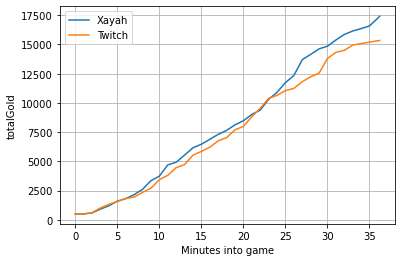

In [8]:
# Use the chamption timeline dataframe to plot the data

# Expant the damage stats and champion stats if required
champion_df_dict = lolA.parse_champion_timeline_dataframe(tl_data)

# Option 1: Plot everyones total gold:
champs_to_plot = tl_data['championName'].unique()

# Option 2: Explicitly select the champs:
champs_to_plot = ['Twitch','Xayah']

# Option 3: Select a roll
print('List of roles avaliable: ',tl_data['individualPosition'].unique())
champs_to_plot = tl_data[ tl_data['individualPosition'] == 'BOTTOM' ]['championName'].unique()

# Option 4: Your own way of deciding how to plot data

# Plotting the data
plotting_key = 'totalGold'
for champ in champs_to_plot:
    plt.plot(champion_df_dict[champ]['time'],champion_df_dict[champ][plotting_key])
    plt.grid(True)
    plt.xlabel('Minutes into game')
    plt.ylabel(plotting_key)
    
plt.legend(champs_to_plot)

Some of the KPIs which are nested maybe of intrest, such as true damage dealt. Implementing the expand_champion_stats method will expand these KPIs for the entire dataframe.

In [9]:
%%time
# expand the DataFrame for additional KPI's/Stats
tl_data_expanded = lolA.expand_champion_stats(tl_data)

Wall time: 5.06 s


Similar to the plot above, the cell below plots the true damage dealt for the bot lane champions.

List of roles avaliable:  ['TOP' 'JUNGLE' 'MIDDLE' 'BOTTOM' 'UTILITY']


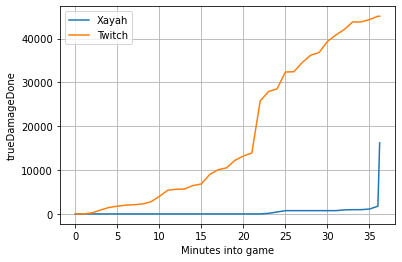

In [10]:
# parse out the information for each champ for easier plotting.
champion_df_dict = lolA.parse_champion_timeline_dataframe(tl_data_expanded)

# Or select a roll
print('List of roles avaliable: ',tl_data_expanded['individualPosition'].unique())
selected_role = 'BOTTOM'

champs_to_plot = tl_data_expanded[ tl_data['individualPosition'] == selected_role ]\
                ['championName'].unique()

df_key = 'trueDamageDone'
for champ in champs_to_plot:
    plt.plot(champion_df_dict[champ]['time'],champion_df_dict[champ][df_key])
    plt.grid(True)
    plt.xlabel('Minutes into game')
    plt.ylabel(df_key)
    
plt.legend(champs_to_plot)


### Example 4: Plotting mulit-game champion timeline data.

Interestingly, by downloading several match timeline's and match summaries it is possible to compare statistics from multiple games.  The example below demonstrates how to plot the total gold for several games for a single summoner name.

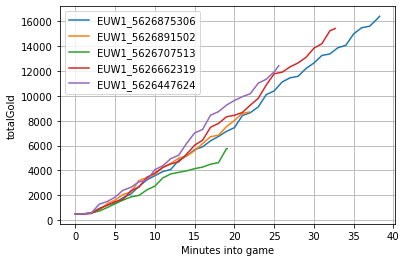

In [11]:
# Comparing stats from game-to-game opposing to champ-to-champ in a single game.

# Get the last 20 match id's:
list_of_games = lolA.get_list_of_matches()

# filter list if necessary, for example the last five games in the list_of_games
games_to_compare = list_of_games[-5:]

# set up data for plotting
game_data = {}
multi_df_dict = {}
for game in games_to_compare:
    game_data[game] = lolA.create_champion_timeline_dataframe(game)
    multi_df_dict[game] = lolA.parse_champion_timeline_dataframe(game_data[game], parse_on='summonerName')
        
df_key = 'totalGold'
summoner_name = lolA.summoner_name

for game in multi_df_dict:
    plt.plot(multi_df_dict[game][summoner_name]['time'],multi_df_dict[game][summoner_name][df_key])
    plt.grid(True)
    plt.xlabel('Minutes into game')
    plt.ylabel(df_key)
    plt.legend(games_to_compare)

Similarly, the plot below shows the total number of minions kills over 5 different matches.

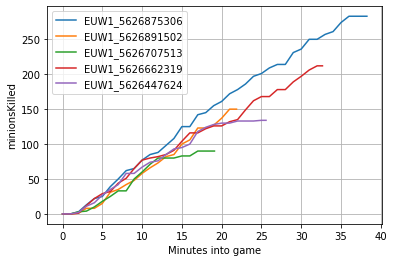

In [12]:
df_key = 'minionsKilled'
summoner_name = lolA.summoner_name

for game in game_data:
    plt.plot(multi_df_dict[game][summoner_name]['time'],multi_df_dict[game][summoner_name][df_key])
    plt.grid(True)
    plt.xlabel('Minutes into game')
    plt.ylabel(df_key)
    plt.legend(games_to_compare)

### Example 5: Combiing multiple summaries into a single dataframe for a single champion.

Another option is to group all the match details together in a single dataframe

In [13]:
summary_df = lolA.combine_match_summaries('Moving Object 1',games_to_compare)
summary_df

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToBuildings,...,turretKills,turretTakedowns,turretsLost,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,match_id
7,5,1,1,20602,18,29,Twitch,0,6,2659,...,1,1,6,0,46,0,3,15,True,EUW1_5626875306
8,3,0,0,7838,11,29,Twitch,0,3,3627,...,1,1,11,0,9,0,0,7,False,EUW1_5626891502
8,1,0,0,5559,9,29,Twitch,0,5,573,...,0,0,10,0,9,0,0,7,False,EUW1_5626707513
8,14,0,0,17023,17,63,Brand,0,6,6370,...,4,4,4,0,19,2,2,4,True,EUW1_5626662319
3,9,0,0,11781,14,29,Twitch,0,3,1250,...,3,3,1,0,24,1,2,12,True,EUW1_5626447624


### Example 6: Plotting positional data on summonmers rift.

The method **plot_positional_data** is able to plot positional data when a column named positions" is passed.   The example blow uses the event data to plot all event for each team. Additionally, **plot_positional_data** is able to plot positional data for two seperate DataFrames.  The first DataFrame is asssumed that data is from teamId=100 (blue team), and the second DataFrame is data from teamId=200 (red team).

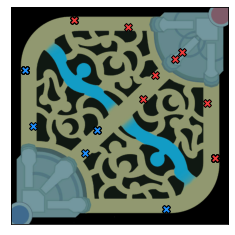

In [14]:
example_plotting_data = lolA.create_event_timeline_dataframe('EUW1_5612017679')
example_plotting_dict = lolA.parse_champion_timeline_dataframe(example_plotting_data, parse_on='teamId')

lolA.plot_positional_data(example_plotting_dict[100.0],example_plotting_dict[200.0])

Additionally, **plot_positional_data** has the option to number the event by DataFrame index.  Events also capture when champions destroyed turret plating, and it should be noted that these events can stack in the same location.

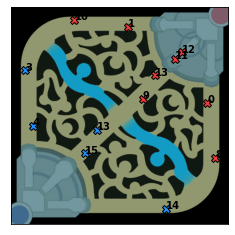

In [15]:
tower_kills_team_1 =  example_plotting_dict[100.0][
    (example_plotting_dict[100.0]['type'] == 'BUILDING_KILL') 
][['time','type','position','summonerName_killer']].sort_values(by='time')

tower_kills_team_2 =  example_plotting_dict[200.0][
    (example_plotting_dict[200.0]['type'] == 'BUILDING_KILL') 
][['time','type','position','summonerName_killer']].sort_values(by='time')

lolA.plot_positional_data(tower_kills_team_1,
                          tower_kills_team_2,
                          index_label=True)

### Example 7: Plotting kills and death locations.

In [16]:
example_plotting_data = lolA.create_event_timeline_dataframe('EUW1_5612017679')
example_plotting_data.columns
killing_data = lolA.parse_champion_timeline_dataframe(example_plotting_data, parse_on='summonerName_killer')
death_data = lolA.parse_champion_timeline_dataframe(example_plotting_data, parse_on='summonerName_victim')

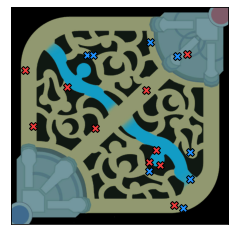

In [17]:
lolA.plot_positional_data(death_data['Moving Object 2'],
                          killing_data['Moving Object 2'],
                          )
# kills -> blue, deaths-> read

### Example 8: Plotting positional data on a summonmers rift -- champion data.

Champion based data contains a considerable more data than event data.  This will need to be filted to have any meaning.

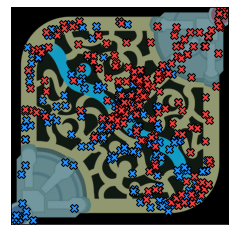

In [18]:
example_plotting_data = lolA.create_champion_timeline_dataframe('EUW1_5612017679')
example_plotting_dict = lolA.parse_champion_timeline_dataframe(example_plotting_data, parse_on='teamId')

lolA.plot_positional_data(example_plotting_dict[100.0],example_plotting_dict[200.0])

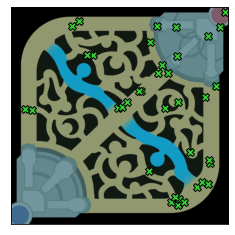

In [19]:
# positional data for a single champion

example_plotting_data = lolA.create_champion_timeline_dataframe('EUW1_5612017679')
example_plotting_data = lolA.expand_champion_stats(example_plotting_data)
example_plotting_data.columns

example_plotting_dict = lolA.parse_champion_timeline_dataframe(
    example_plotting_data, 
    parse_on='summonerName')

lolA.plot_positional_data(example_plotting_dict['Moving Object 2'])
